# Yelp Review Analysis

Positive yelp reviews are crucial for a business. Yelp not only drives traffic to
business but easily helps users make decisions about which establishment to visit.
These decisions are often made based on reviews.

A restaurant owner may want to tailor the customer experience to items which lead to
high reviews and make business decisions to eliminate/reduce anything that can lead
to negative reviews.

The goal will be to use data science methods that will help establish a connection
between the rating levels and what might drive them.

The target clients would be restaurant/business owners who are looking to
improve their ratings. They would be interested in business decisions that could directly
lead to a better customer review.

Business Problems 

1. Will the customer reviews help in the indiaction of the provided rating?

2. How Can restaurans access theri sucess and faults based on reviews?

3. What aspects of the business are correlated beetween positive and negative sentiments?

# Data

The data that will be used comes from the Yelp dataset on Kaggle:
    https://www.kaggle.com/ravijoe/loading-yelp-json-data-and-visualization/data
        

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import TruncatedSVD

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [3]:
review_json_path = 'yelp_academic_dataset_review.json'
business_json_path = 'yelp_academic_dataset_business.json'
checkin_json_path = 'yelp_academic_dataset_review.json'

In [4]:
df_b = pd.read_json(business_json_path, lines=True)

In [5]:
df_b.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None


C:\Users\serik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'City')

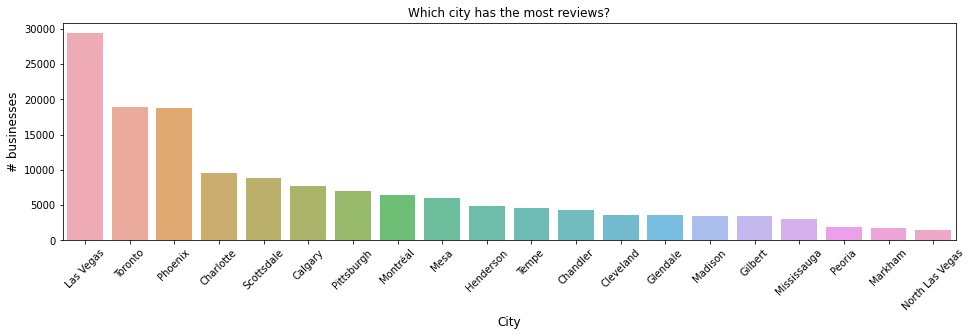

In [6]:
#Get the distribution of the ratings
x=df_b['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

C:\Users\serik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Star Ratings ')

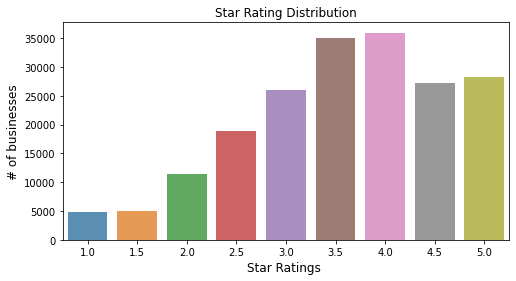

In [7]:
x=df_b['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

In [8]:

df_b = df_b.drop(columns = ['postal_code', 'address', 'latitude', 'longitude', 'hours'])

In [9]:
df_b = df_b.loc[df_b.categories.str.contains("Restaurants", na=False)]

In [10]:
df_b = df_b.loc[df_b['city'] == 'Las Vegas']

In [11]:
df_b = df_b.loc[df_b.categories.str.contains("Japanese", na=False)]

In [12]:
df_b.head()

,business_id,name,city,state,stars,review_count,is_open,attributes,categories
755,gFjHMjQXn5pbObxJupiuPA,Bar Charlie,Las Vegas,NV,5.0,14,0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Japanese, Restaurants"
1077,8bZ49zy4KlFVu5teFETYhQ,Go Wild Sushi & Grill,Las Vegas,NV,3.5,53,0,"{'WiFi': 'u'no'', 'GoodForKids': 'True', 'Rest...","Japanese, Sushi Bars, Restaurants"
1681,bZs7FJ7fHIJxVecfp1qvug,Takopa,Las Vegas,NV,4.0,51,1,None,"Ramen, Restaurants, Japanese, Tapas/Small Plat..."
2043,vfqUUh_5KF3R7mz2XiNXGg,Tokyo Peking Asian Restaurants,Las Vegas,NV,5.0,24,0,"{'HasTV': 'False', 'Ambience': '{'touristy': F...","Asian Fusion, Japanese, Sushi Bars, Restaurants"
2347,5yZ1XmDcOEsElDeb9PlPDQ,Yagyu Ramen,Las Vegas,NV,4.0,150,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Japanese, Ramen"


In [13]:
df_b.isna().sum()

business_id      0
name             0
city             0
state            0
stars            0
review_count     0
is_open          0
attributes      11
categories       0
dtype: int64

In [14]:
df_b = df_b[df_b['attributes'].notna()]

In [15]:
business_data_for_eda = df_b.copy()

In [16]:
reviews_json = 'yelp_academic_dataset_review.json'
size = 500000
reviews = pd.read_json(reviews_json, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'useful':int,'funny':int,'cool':int,
                             'text':str},
                      chunksize=size)

In [17]:
chunk_list = []
for chunk_review in reviews:
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(df_b, chunk_review, on='business_id', how='inner')
    # Show progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
df_b = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

5478 out of 500,000 related reviews
9402 out of 500,000 related reviews
11021 out of 500,000 related reviews
10592 out of 500,000 related reviews
8205 out of 500,000 related reviews
8862 out of 500,000 related reviews
8373 out of 500,000 related reviews
5797 out of 500,000 related reviews
11562 out of 500,000 related reviews
8954 out of 500,000 related reviews
7789 out of 500,000 related reviews
7259 out of 500,000 related reviews
11253 out of 500,000 related reviews
4256 out of 500,000 related reviews


# Descriptive Analytics and EDA

In [18]:
business_data_for_eda.describe()

,stars,review_count,is_open
count,381.000000,381.000000,381.000000
mean,3.837270,300.503937,0.566929
std,0.602431,403.386569,0.496152
min,1.000000,3.000000,0.000000
25%,3.500000,49.000000,0.000000
50%,4.000000,153.000000,1.000000
75%,4.000000,396.000000,1.000000
max,5.000000,3449.000000,1.000000


In [19]:
business_data_for_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 755 to 192204
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   381 non-null    object 
 1   name          381 non-null    object 
 2   city          381 non-null    object 
 3   state         381 non-null    object 
 4   stars         381 non-null    float64
 5   review_count  381 non-null    int64  
 6   is_open       381 non-null    int64  
 7   attributes    381 non-null    object 
 8   categories    381 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 29.8+ KB


# Star Ratings Distribution

In [20]:

x = business_data_for_eda['stars'].value_counts()
x = x.sort_index()

C:\Users\serik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Star Ratings ')

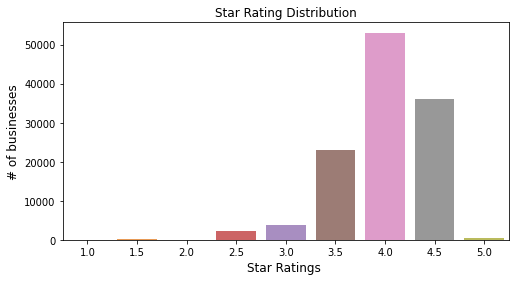

In [21]:
x=df_b['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

C:\Users\serik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


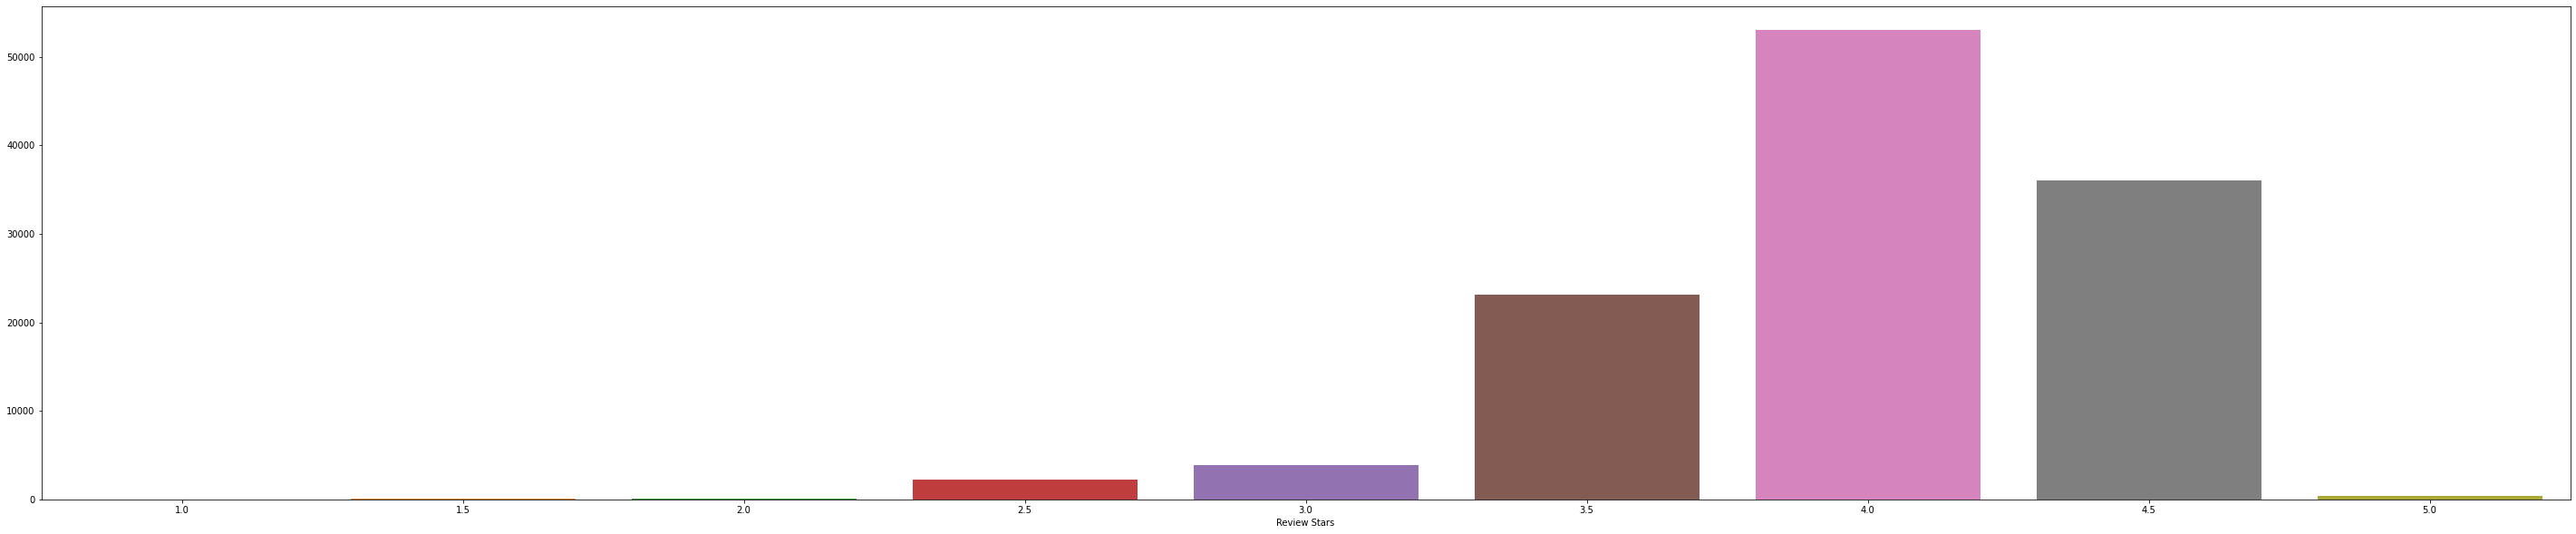

In [22]:

plt.figure(figsize=(50,10))
sns.barplot(x.index,x.values)
plt.xlabel('Review Stars')
sns.set_palette("cubehelix")
plt.savefig('stars.png')

# Distribution of Review Count


C:\Users\serik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


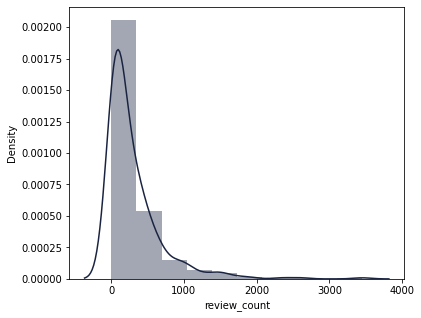

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(6,5))
sns.distplot(business_data_for_eda["review_count"], bins=10)
plt.show()
sns.set_palette("cubehelix")
plt.savefig('histo.png')

# Top 10 Restaurants

In [24]:
rest = business_data_for_eda.sort_values('review_count', ascending=False)
rest = rest.head(10)

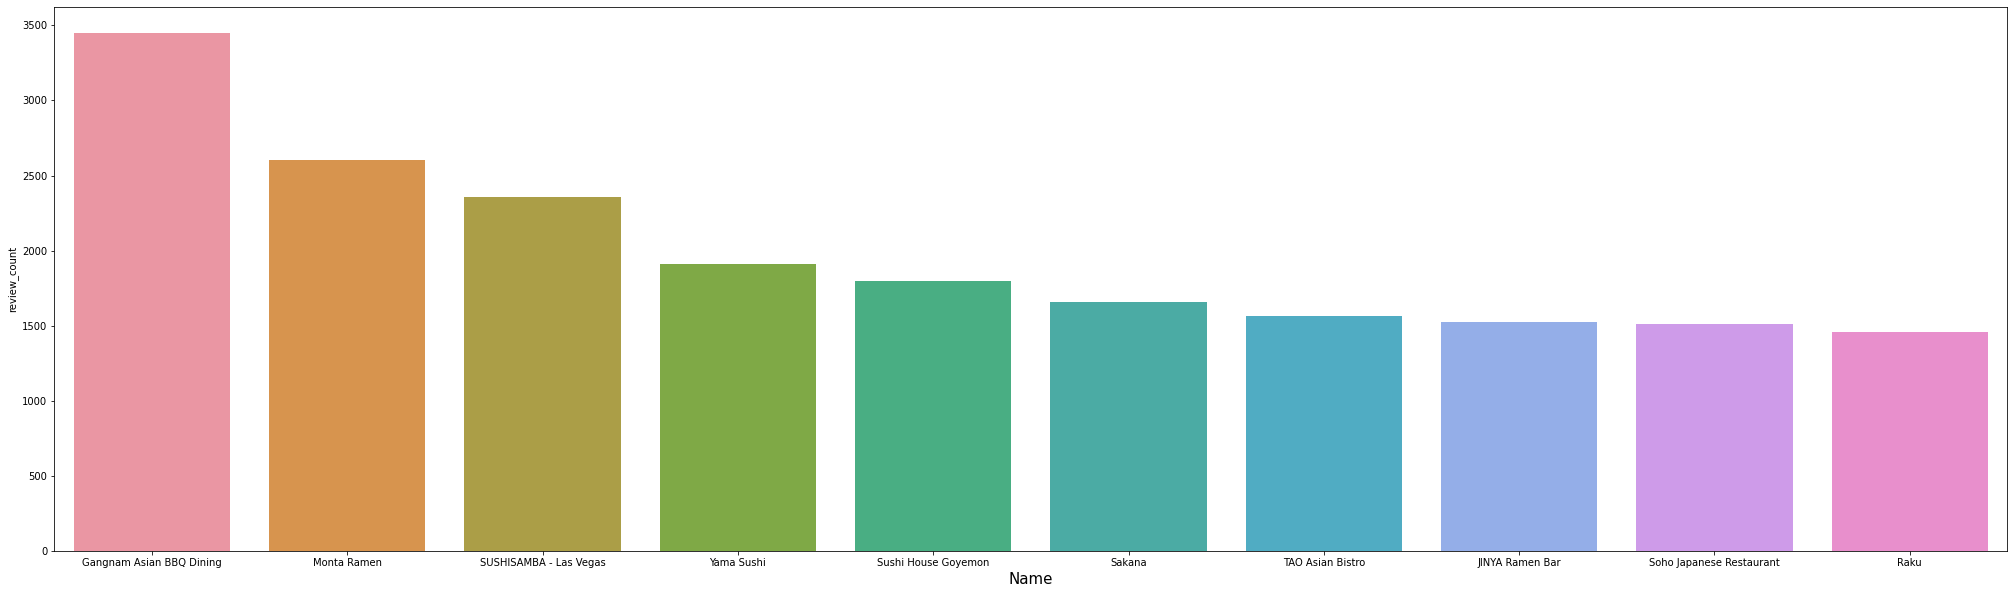

In [25]:
plt.figure(figsize=(35,10))
sns.barplot(x=rest['name'], y=rest['review_count'])
plt.xlabel("Name", fontsize=15)
plt.savefig('top_rest.png')
sns.set_palette("cubehelix")

# Top Categories

In [26]:
business_cats = ''.join(business_data_for_eda['categories'].astype('str'))
cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

x=cats.categories.value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:9]

C:\Users\serik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


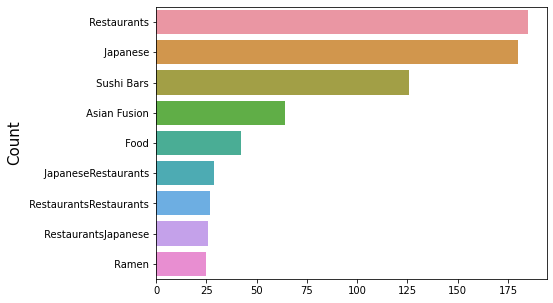

In [27]:
plt.figure(figsize=(7,5))
sns.barplot(x.values, x.index)
plt.ylabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.savefig('categories.png')
sns.set_palette("cubehelix")

# Preprocessing

In [28]:
df_b.head(2)

,business_id,name,city,state,stars,review_count,is_open,attributes,categories,review_id,user_id,review_stars,useful,funny,cool,text,date
0,gFjHMjQXn5pbObxJupiuPA,Bar Charlie,Las Vegas,NV,5.0,14,0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Japanese, Restaurants",PuxAT1gXelYEQLRYYOdweA,hCtRIHfTUjGKrxFrwfSurw,5,2,1,2,Best japanese cuisine I've ever had.\nI got th...,2009-03-11 00:47:05
1,gFjHMjQXn5pbObxJupiuPA,Bar Charlie,Las Vegas,NV,5.0,14,0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Japanese, Restaurants",mg0dMCi1Mw76blMRsH9_AA,z40L7vjk_Zpru3nqV7CafQ,5,2,1,2,"Simply put, one of the best and most memorable...",2010-01-11 06:48:36


In [29]:
df_b['sentiment'] = df_b['review_stars'].apply(lambda rating : +1 if rating > 3 else 0)

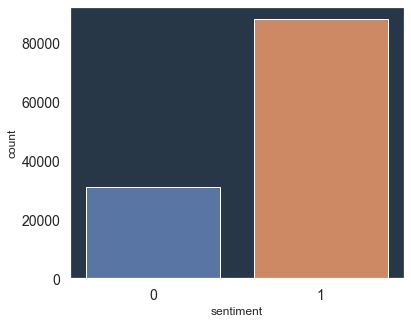

In [30]:
plt.figure(figsize=(6,5))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
ax = sns.countplot(x=df_b['sentiment'])
plt.savefig('sentiment_counts.png')

In [31]:

wpt=nltk.WordPunctTokenizer()
stop_words=nltk.corpus.stopwords.words('english')

In [32]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter=PorterStemmer()

In [33]:
def normalize_document (doc):
    doc=re.sub(r'[^a-zA-Z\s]', '', doc) 
    doc=doc.lower()
    doc=doc.strip()
    tokens=wpt.tokenize(doc)
    filtered_tokens=[token for token in tokens if token not in stop_words]
    stem_sentence=[]
    for word in filtered_tokens:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    doc=' '.join(stem_sentence)
    
    return doc

In [34]:
text_column = df_b['text']
normalize_corpus=np.vectorize(normalize_document)
norm_corpus = normalize_corpus(text_column)

In [35]:
type(norm_corpus)

numpy.ndarray

In [36]:
df_b['text_preprocessed'] = norm_corpus

In [37]:

X = df_b['text_preprocessed']
y = df_b['sentiment']

In [38]:
X.shape, y.shape

((118803,), (118803,))

In [39]:
norm_corpus = X.tolist()
y = y.values

In [40]:
type(norm_corpus), type(y)

(list, numpy.ndarray)

# Saving Normalized Data

In [41]:
with open ('X.pickle','wb') as f:#wb, write-byte
    pickle.dump (X,f)

In [42]:
with open ('y.pickle','wb') as f:#wb, write-byte
    pickle.dump (y,f)

In [43]:
with open ('norm_corpus.pickle', 'wb') as f: 
    pickle.dump(norm_corpus,f)

# Wordclouds

In [44]:

negative = df_b.loc[df_b['review_stars'] <= 2.0]
positive = df_b.loc[df_b['review_stars'] > 2.0]

# Negative Sentiment

In [45]:
stopwords = set(STOPWORDS)
negative_rev = "_".join(review for review in negative.text_preprocessed)

In [46]:
wordcloud_neg = WordCloud(
                            stopwords = STOPWORDS,
                            background_color = 'black',
                            width = 1200,
                            height = 1000,
                            collocation_threshold = 5
                            ).generate(negative_rev)

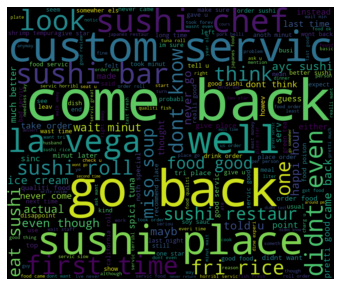

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(6,5))
plt.imshow(wordcloud_neg,interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig('neg_wordcloud.png')

# Positive Sentiment

In [48]:
positive_rev = "_".join(review for review in positive.text_preprocessed)

In [49]:
wordcloud_pos = WordCloud(
                            stopwords = STOPWORDS,
                            background_color = 'black',
                            width = 1200,
                            height = 1000,
                            collocation_threshold = 5
                            ).generate(positive_rev)

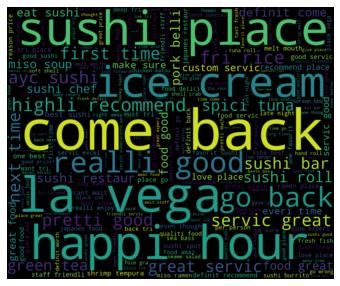

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure(figsize=(6,5))
plt.imshow(wordcloud_pos,interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig('pos_wordcloud.png')

# Feature Selection

In [51]:
with open('norm_corpus.pickle', 'rb') as f: 
    norm_corpus = pickle.load(f)

In [52]:
train_X, valid_X, train_y, valid_y = train_test_split(norm_corpus, y, random_state = 0, test_size=0.2)

# Pipeline

In [53]:
def accuracy_summary(pipeline, train_X, train_y, valid_X, valid_y):
    sentiment_fit = pipeline.fit(train_X, train_y)
    y_pred = sentiment_fit.predict(valid_X)
    accuracy = accuracy_score(valid_y, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [54]:
cv = CountVectorizer()
lg = LogisticRegression(max_iter=500)
n_features = np.arange(5000,15001,2500)

In [55]:

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 3), classifier=lg):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, train_X, train_y, valid_X, valid_y)
        result.append((n,nfeature_accuracy))
    return result

In [56]:
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

LogisticRegression(max_iter=500)


Test result for 5000 features
accuracy score: 91.94%
Test result for 7500 features
accuracy score: 92.10%
Test result for 10000 features
accuracy score: 92.17%
Test result for 12500 features
accuracy score: 92.18%
Test result for 15000 features
accuracy score: 92.25%


# N-gram Selection


Pipeline

In [57]:
train_X, valid_X, train_y, valid_y = train_test_split(norm_corpus, y, random_state = 0, test_size=0.2)

In [58]:

def accuracy_summary(pipeline, train_X, train_y, valid_X, valid_y):
    sentiment_fit = pipeline.fit(train_X, train_y)
    y_pred = sentiment_fit.predict(valid_X)
    accuracy = accuracy_score(valid_y, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [59]:
cv = CountVectorizer()
lg = LogisticRegression(max_iter=500)
n_features = 12500
n_gram_range = np.arange(1,4,1)

In [60]:

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=n_gram_range, classifier=lg):
    result = []
    print(classifier)
    print("\n")
    for n in n_gram_range:
        ngram_tuple = (n, n)
        vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_tuple)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} n-grams".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, train_X, train_y, valid_X, valid_y)
        result.append((n,nfeature_accuracy))
    return result

In [61]:
tfidf = TfidfVectorizer()
print("Result for N-grams with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf)

Result for N-grams with stop words (Tfidf)

LogisticRegression(max_iter=500)


Test result for 1 n-grams
accuracy score: 91.49%
Test result for 2 n-grams
accuracy score: 89.26%
Test result for 3 n-grams
accuracy score: 82.00%


# LSA and Topic Modeling

In [62]:
vectorizer = TfidfVectorizer (ngram_range=(2,2),max_features=12500)
X = vectorizer.fit_transform (norm_corpus)

In [63]:
print (X[0])

  (0, 4786)	0.16765148928076926
  (0, 7870)	0.25799580703720243
  (0, 2755)	0.196339829514598
  (0, 5938)	0.3268706784267663
  (0, 11454)	0.2716224806618694
  (0, 7313)	0.334687401010182
  (0, 3057)	0.31639361335934846
  (0, 12208)	0.33523071929387577
  (0, 1775)	0.28084040729965476
  (0, 2777)	0.33690648731569456
  (0, 5116)	0.18508458914754064
  (0, 5163)	0.2618097632908019
  (0, 886)	0.2578379677888782


In [64]:
lsa = TruncatedSVD (n_components=5, n_iter=100)#n_com nmber of concepts we want to find
lsa.fit(X)

TruncatedSVD(n_components=5, n_iter=100)

In [65]:
Sigma = lsa.singular_values_
Sigma

array([22.75866164, 15.7709129 , 15.30832513, 15.12856197, 14.02177348])

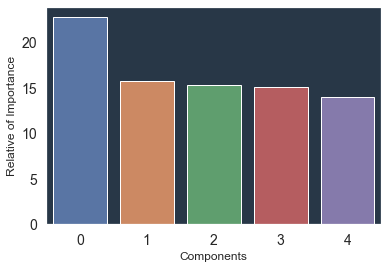

In [66]:
ax = sns.barplot(x=list(range(len(Sigma))), y = Sigma)
ax.set(xlabel='Components', ylabel='Relative of Importance')
plt.savefig('lsa.png')

In [67]:
row1 = lsa.components_[0] #the row 1 
row1

array([0.00222333, 0.00412327, 0.00194638, ..., 0.00159614, 0.00181771,
       0.00252315])

In [68]:
terms = vectorizer.get_feature_names()
terms[:20]

C:\Users\serik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abl accommod',
 'abl eat',
 'abl enjoy',
 'abl find',
 'abl finish',
 'abl get',
 'abl make',
 'abl order',
 'abl seat',
 'abl sit',
 'abl tri',
 'absolut amaz',
 'absolut best',
 'absolut delici',
 'absolut fantast',
 'absolut favorit',
 'absolut horribl',
 'absolut love',
 'absolut must',
 'absolut perfect']

In [69]:
concept_words = {}

for i,comp in enumerate(lsa.components_):#enumerate return index and row, a list of tuples
    componentTerms = zip(terms,comp) #we use zip to combine values and terms
    #sort component terms, by concept value,lambda x (x correpsnding tuples) and X[1] the value
    sortedTerms = sorted(componentTerms, key=lambda x:x[1], reverse=True) #decending order
    sortedTerms = sortedTerms[:10] #select 10 most imp. terms in a specific concept
    concept_words["Concept " + str(i)] = sortedTerms #all concepts mapped with list of tuples

In [70]:
concept_words

{'Concept 0': [('come back', 0.2431157699795418),
  ('sushi place', 0.17997107780816396),
  ('happi hour', 0.1780473263387265),
  ('la vega', 0.16806065163897935),
  ('great servic', 0.16015274565389245),
  ('great food', 0.1536805335141426),
  ('servic great', 0.1356425593111377),
  ('food great', 0.1315095547684829),
  ('first time', 0.12967232600828385),
  ('highli recommend', 0.12603940331979532)],
 'Concept 1': [('great food', 0.5218811933526182),
  ('great servic', 0.49262986808609727),
  ('food great', 0.4280575951443947),
  ('servic great', 0.2475597987304866),
  ('great price', 0.08176026154274581),
  ('place great', 0.05714059964624763),
  ('love place', 0.05361362620297428),
  ('food servic', 0.052900967319602504),
  ('definit come', 0.05038352348898008),
  ('great atmospher', 0.048969269792875)],
 'Concept 2': [('happi hour', 0.6312600412664084),
  ('hour menu', 0.11258051002345781),
  ('sushi place', 0.11243780374871014),
  ('great servic', 0.09678187490235529),
  ('la veg

# Model Implementation

# BOW and TF-IDF

In [74]:
vectorizer = CountVectorizer(max_features=12500,min_df=3, max_df=0.8, stop_words=stopwords.words('english'), 
                            ngram_range=(2,2))
X = vectorizer.fit_transform(norm_corpus).toarray()

In [75]:
transformer = TfidfTransformer(norm='l2', use_idf=True)

In [76]:
X=transformer.fit_transform(X).toarray()

# Vocabulary

In [77]:
vocab=vectorizer.get_feature_names()
pd.DataFrame(X,columns=vocab).head(1)

,abl accommod,abl eat,abl enjoy,abl find,abl finish,abl get,abl make,abl order,abl seat,abl sit,...,yummi grill,yummi servic,yummi sushi,yuzu sauc,yuzu sorbet,yuzu soy,yuzu yellowtail,zaru soba,zen curri,zero star
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting Data

In [78]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# Fitting to Model

In [79]:
classifier = LogisticRegression(max_iter=100)
classifier.fit(train_X,train_y)

LogisticRegression()

In [80]:
y_pred = classifier.predict(valid_X)

# Model Evaluation

In [81]:

cm = confusion_matrix(valid_y,y_pred)
cm

array([[ 4245,  1949],
       [  605, 16962]], dtype=int64)

<AxesSubplot:>

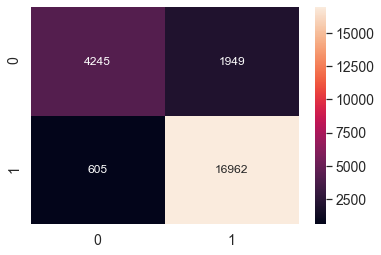

In [82]:
sns.heatmap(cm, annot=True, fmt='g')

In [83]:

from sklearn.metrics import accuracy_score
accuracy_score (valid_y,y_pred)

0.8925129413745213

In [84]:
from sklearn.metrics import recall_score
recall_score (valid_y,y_pred)

0.965560425798372

In [85]:
from sklearn.metrics import f1_score
f1_score (valid_y,y_pred)

0.9299851965568288

In [86]:
from sklearn.metrics import precision_score
precision_score (valid_y,y_pred)

0.8969382898841944

In [87]:
print(classification_report(valid_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      6194
           1       0.90      0.97      0.93     17567

    accuracy                           0.89     23761
   macro avg       0.89      0.83      0.85     23761
weighted avg       0.89      0.89      0.89     23761



# ROC Curve

In [88]:
lr_probs = classifier.predict_proba(valid_X)
lr_probs = lr_probs[:, 1]

In [89]:
lr_auc = roc_auc_score(valid_y, lr_probs)

In [90]:
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.947


In [91]:
lr_fpr, lr_tpr, _ = roc_curve(valid_y, lr_probs)

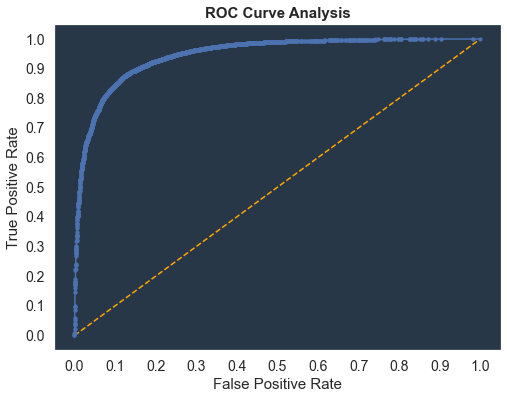

In [92]:
fig = plt.figure(figsize=(8,6))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.savefig('roc.png')

# Feature Importance

In [93]:
classifier.coef_

array([[ 0.34578709,  0.06644219,  0.05549164, ..., -0.33040427,
        -0.00856016, -2.32501342]])

In [94]:
feature_importance=pd.DataFrame({'feature':vectorizer.get_feature_names(),'feature_importance':classifier.coef_[0]})
feature_importance_pos=feature_importance.sort_values('feature_importance',ascending=False).head(10)
feature_importance_neg = feature_importance.sort_values('feature_importance',ascending=True).head(10)

C:\Users\serik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [95]:
feature_importance_neg

,feature,feature_importance
3490,food ok,-6.695062
12235,wont back,-6.541443
6496,never come,-6.285654
10942,three star,-6.217291
3491,food okay,-5.606896
3504,food poison,-5.606606
6769,noth special,-5.425354
9474,servic horribl,-5.196491
6508,never go,-5.146764
11446,two star,-5.007453


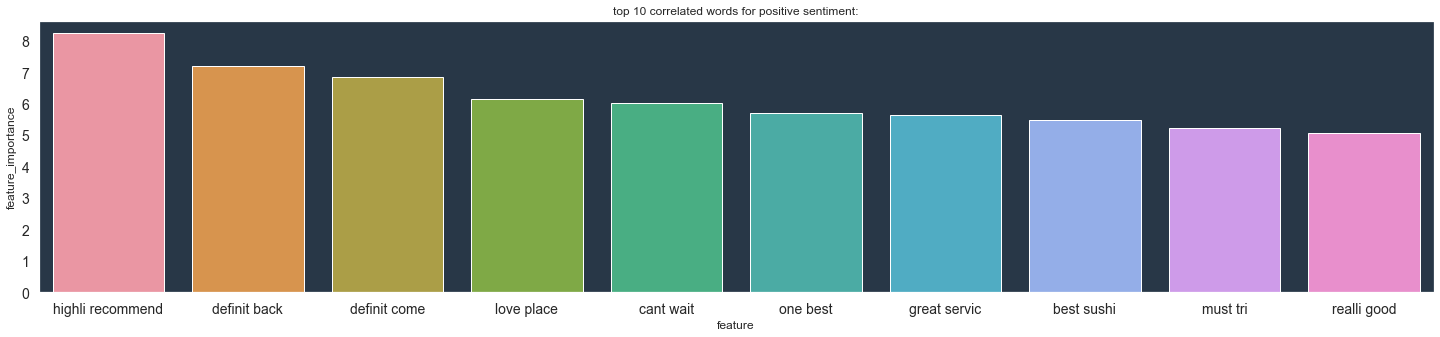

In [96]:
plt.figure(figsize=(25,5))
sns.set_palette("cubehelix")
sns.barplot(x=feature_importance_pos['feature'], y=feature_importance_pos['feature_importance']).set_title('top 10 correlated words for positive sentiment:')
plt.savefig('pos_feat_imp.png')

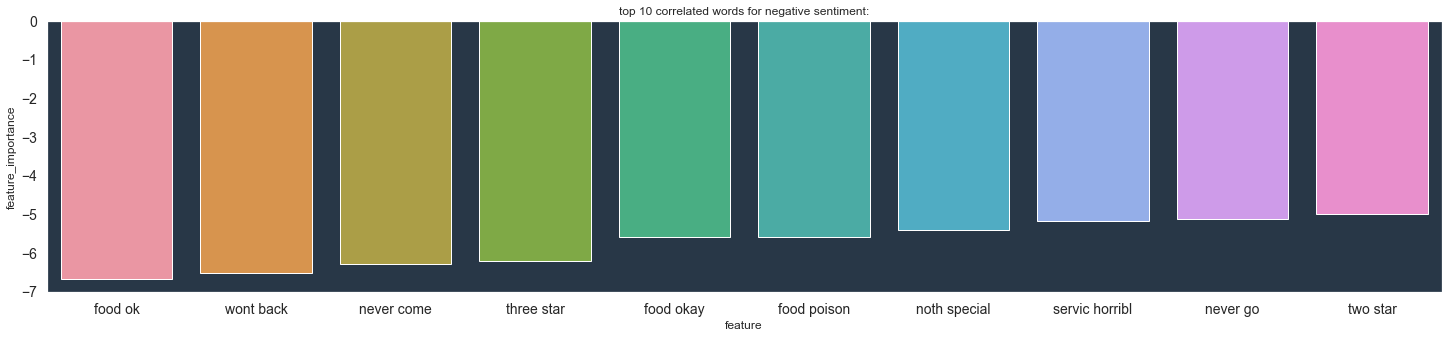

In [97]:

plt.figure(figsize=(25,5))
sns.set_palette("cubehelix")
sns.barplot(x=feature_importance_neg['feature'], y=feature_importance_neg['feature_importance']).set_title('top 10 correlated words for negative sentiment:')
plt.savefig('neg_feat_imp.png')
